<a href="https://colab.research.google.com/github/neeluvermaiitj/Autoencoder-and-PCA-comparision/blob/main/Image_en_dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#code 1 in keras tensorflow
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#from scitools.std import plot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from keras.regularizers import l1
from keras.optimizers import Adam
warnings.filterwarnings('ignore')
#from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input


from sklearn.model_selection import train_test_split

import numpy as np
import cv2
import glob
filenames = [img for img in glob.glob("/content/drive/My Drive/Colab Notebooks/assign3/lfw/George_W_Bush/*.jpg")]

filenames.sort() # ADD THIS LINE
print(len(filenames))
images = []
for faces in filenames:
    n= cv2.imread(faces,0)
    #m= n.resize((100, 100))
    images.append(n)
    #print(faces)

X = np.array(images)
print(X.shape)
n_samples, h, w = X.shape
n_features = X.shape[0]

X = X.reshape(530,62500)

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)

train, test = train_test_split(X, test_size=0.1, random_state=42)
X_train, X_val = train_test_split(train, test_size=0.2, random_state=42)

X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.
X_test = test.astype('float32') / 255.

print("Training images size:",len(X_train))
print("Validation images size:",len(X_val))
print("Testing images size:",len(X_test))

print("Training images shape:",X_train.shape)
print("validation images shape:", X_val.shape )
print("Testing images shape:", X_test.shape)

#X = X.reshape(530,62500)

530
(530, 250, 250)
Total dataset size:
n_samples: 530
n_features: 530
Training images size: 381
Validation images size: 96
Testing images size: 53
Training images shape: (381, 62500)
validation images shape: (96, 62500)
Testing images shape: (53, 62500)


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 2048 
input_img = Input(shape=(62500,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(62500, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='mse')

from keras.callbacks import TensorBoard

autoencoder_train = autoencoder.fit(X_train, X_train,
                epochs=60,
                batch_size=36,
                shuffle=True,
                validation_data=(X_val, X_val),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 381 samples, validate on 96 samples
Epoch 1/60
381/381 [==============================] - 38s 101ms/step - loss: 0.0697 - val_loss: 0.0518
Epoch 2/60
381/381 [==============================] - 38s 99ms/step - loss: 0.0513 - val_loss: 0.0459
Epoch 3/60
381/381 [==============================] - 37s 98ms/step - loss: 0.0453 - val_loss: 0.0412
Epoch 4/60
381/381 [==============================] - 38s 99ms/step - loss: 0.0404 - val_loss: 0.0378
Epoch 5/60
381/381 [==============================] - 37s 97ms/step - loss: 0.0376 - val_loss: 0.0369
Epoch 6/60
381/381 [==============================] - 37s 97ms/step - loss: 0.0346 - val_loss: 0.0349
Epoch 7/60
381/381 [==============================] - 37s 97ms/step - loss: 0.0319 - val_loss: 0.0326
Epoch 8/60
381/381 [==============================] - 37s 98ms/step - loss: 0.0304 - val_loss: 0.0335
Epoch 9/60
381/381 [==============================] - 39s 102ms/step - loss: 0.0290 - val_loss: 0.0317
Epoch 10/60
381/381 [==============

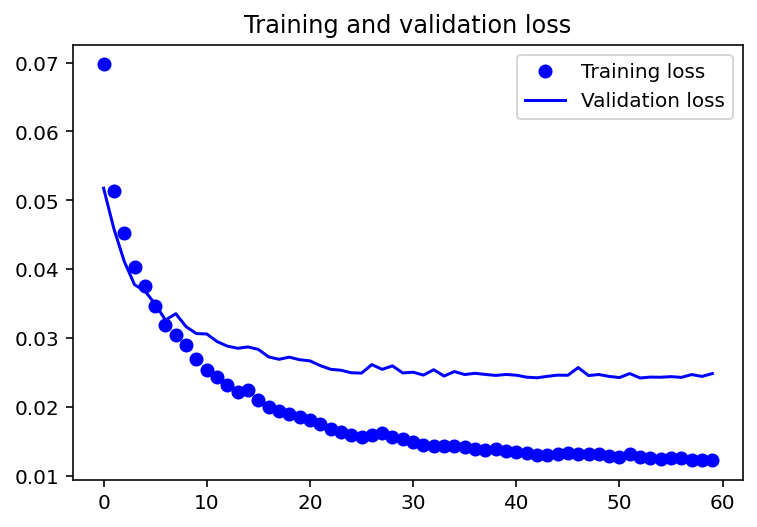

In [ ]:
epochs=60
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

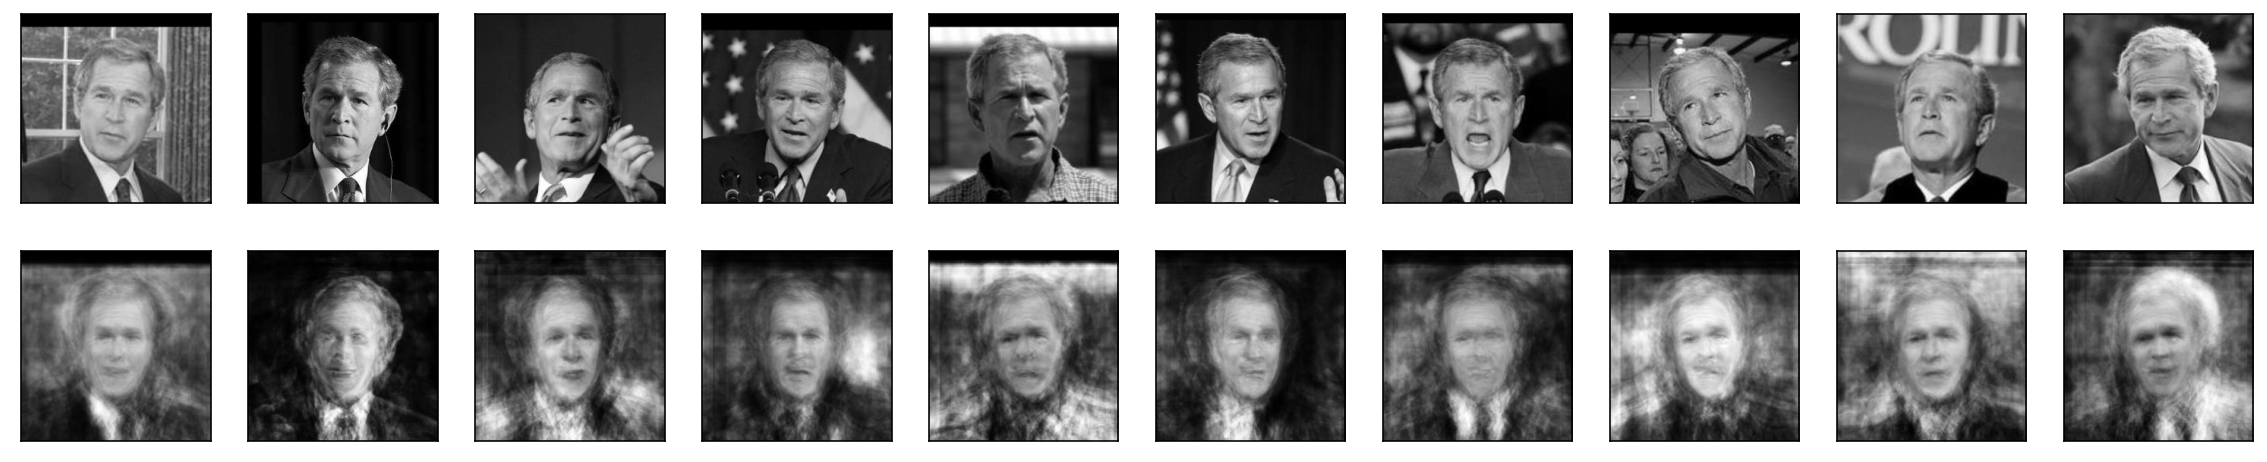

In [ ]:

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(250, 250))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(250, 250))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
#learned weights by model
weights = autoencoder.get_weights()[0].T
n = 5
plt.figure(figsize=(20, 10))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(weights[i+50].reshape(250, 250))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
#Testing loss
autoencoder.evaluate(X_test, X_test)

53/53 [==============================] - 1s 15ms/step


0.02453251137345467